# Introduction

Sentiment Analysis is the method of identifying attitudes in text data about a subject of interest. The primary reason for conducting sentiment analysis is that certain people consider climate change as a hoax and therefore, it's intriguing to study people's perception of it. \
Sentiment is scored using polarity values ranging from 1 to -1 with "Text Blob" package of Python where 1 indicates positivity and -1 negativity. A histogram was plotted to identify the overall sentiment towards climate change. Moreover, the amount of factual information present in the text is quantified by subjectivity which is also calculated using "Text Blob. Higher subjectivity correponds to higher personal information present in the text than factual information.\
Using polarity, we also classified each tweet into 3 categories namely "positive", "negative" and "neutral". Positive words correspond to those words which are in favour of climate change, .i.e., people believe that climage change is a serious issue and adequate measures should be taken against it whereas negative words represent the sentiments of neglect towards climate change such as "amp" and also words that define the worse condition of it. To better understand positive and negative words, we visualised them separately in a word cloud with white and black background repectively.


*References*
* https://planspace.org/20150607-textblob_sentiment/
* https://towardsdatascience.com/my-absolute-go-to-for-sentiment-analysis-textblob-3ac3a11d524

#### Import libraries

In [1]:
import pandas as pd
from textblob import TextBlob
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
import sys
import wordcloud as WordCloud
import itertools
import collections
import warnings
warnings.filterwarnings('ignore')

#### Read the cleaned data

In [2]:
data = pd.read_csv('./cleaned_data.csv')
data.sample(5)

,date,id,tweets_text,clean_txt,clean_words_text,tweet_length
7662,2021-05-06 06:07:19,1.390186e+18,@ProfTimNoakes @timspector @gerdosi @FatEmpero...,proftimnoakes timspector gerdosi fatemperor zo...,proftimnoakes timspector gerdosi fatemperor zo...,252
9708,2021-05-05 23:03:29,1.390080e+18,@KindlyRight Kamala must’ve done this study! S...,kindlyright kamala mustve done this study soun...,kindlyright kamala mustve done study sound lik...,261
2702,2021-05-06 17:03:29,1.390352e+18,The Secretary-General must speak for those who...,the secretarygeneral must speak for those who ...,secretarygeneral must speak voice intergovernm...,212
7689,2021-05-06 06:01:00,1.390185e+18,Climate Change Targets Bitcoin Mining: NY Lawm...,climate change targets bitcoin mining ny lawma...,target bitcoin mining ny lawmaker proposes mor...,234
6820,2021-05-06 08:55:02,1.390229e+18,Podcast Week: Ella Hooper on Front &amp; Centr...,podcast week ella hooper on front amp centre a...,podcast week ella hooper front amp centre angi...,228


In [3]:
# check if there are any na values in clean_words_text
print(data['clean_words_text'].isna().sum())

2


In [4]:
# fill na 
data['clean_words_text'] = data['clean_words_text'].fillna("")

#### Polarity and Subjectivity Calculation

In [5]:
# Create textblob objects of the tweets
sentiment_objects = [TextBlob(tweet) for tweet in data['clean_words_text']]

# Create list of polarity,subjectivity values and tweet text
sentiment_values = [[tweet.sentiment.polarity, str(tweet)] for tweet in sentiment_objects]
subjectivity_values = [[tweet.sentiment.subjectivity, str(tweet)] for tweet in sentiment_objects]

In [6]:
# Create a dataframe
sentiment_df = pd.DataFrame(sentiment_values, columns=["polarity", "tweet"])
subjectivity_df = pd.DataFrame(subjectivity_values, columns=["subjectivity", "tweet"])
df = subjectivity_df.merge(sentiment_df, on = "tweet")
df.sample(5)

,subjectivity,tweet,polarity
1996,0.466667,despite host natural disaster coverage among m...,0.220833
8879,0.250000,birdstellus farmer rancher forester vital figh...,0.100000
8056,0.250000,birdstellus farmer rancher forester vital figh...,0.100000
9230,0.250000,birdstellus farmer rancher forester vital figh...,0.100000
16845,0.350000,elonmusk people multi generation time horizon ...,0.200000


#### Subjectivity visualtion
This plot shows that more tweets had factual information rather than personal information.

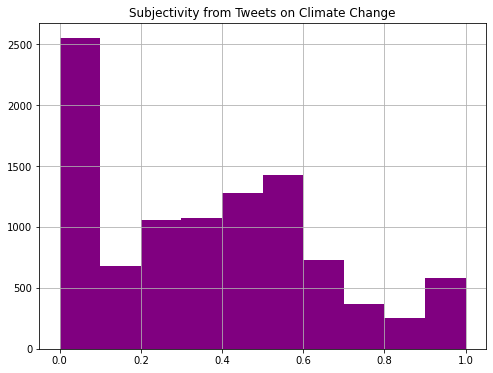

In [7]:
# Plot histogram of the subjectivity values
fig, ax = plt.subplots(figsize=(8, 6))
subjectivity_df.hist(ax=ax,
             color="purple")

plt.title("Subjectivity from Tweets on Climate Change")
plt.show()

#### Polarity Visualisation
This plot displays a histogram in which polarity values equal to zero have been removed, and a break has been added at zero, to better highlight the distribution of polarity values. It can be cleary seen that more words in the tweets are positive.

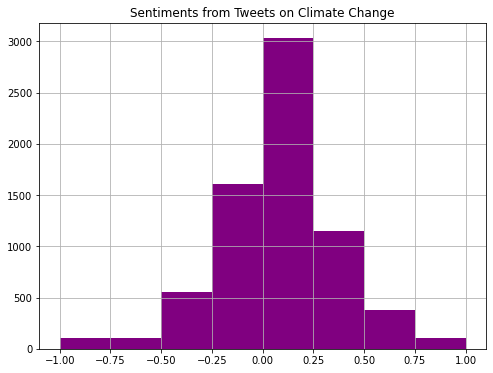

In [8]:
# Plot of polarity values not equal to zero

# Remove polarity values equal to zero
sentiment_df2 = sentiment_df[sentiment_df.polarity != 0]
fig, ax = plt.subplots(figsize=(8, 6))

# Plot histogram with break at zero
sentiment_df2.hist(bins=[-1, -0.75, -0.5, -0.25, 0.0, 0.25, 0.5, 0.75, 1],
             ax=ax,
             color="purple")

plt.title("Sentiments from Tweets on Climate Change")
plt.show()

#### Word Cloud
For this, the tweets were categorised into positive, negative and neutral on the basis of polarity. The tweets with polarity equal to 0 were labeled neutral and with polarity greater than 0 were considered as positive.

In [9]:
# Categorising tweets into positive, negative and neutral on the basis of polarity
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'
    
df['sentiment'] = df['polarity'].apply(getAnalysis )

#### Distribution of sentiments
About 71% of the tweets in our data have been represented as "positive sentiment" which shows that people in general are really concerned about the topic climate change and support the topic. However, only 15% of tweets show a negative sentiment indicating very few people think that climate change is a hoax or something of their concern.

<AxesSubplot:ylabel='Sentiments'>

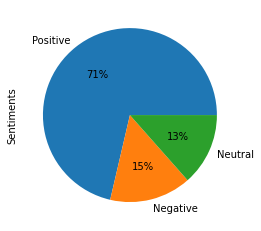

In [10]:
df['sentiment'].value_counts().plot(kind='pie', label = "Sentiments",autopct='%1.0f%%')

#### Positive words - Word Cloud
We can see that words such as "support", "take", "action" and "vital" are the most common among the positive words.

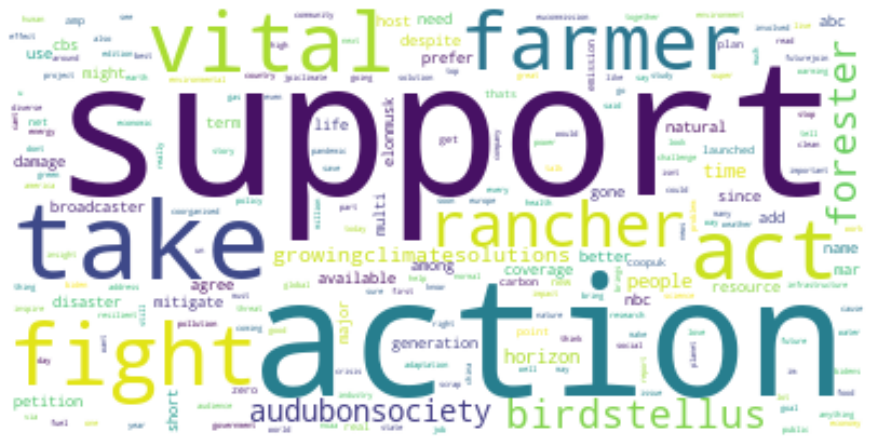

In [11]:
# Positive words visulisation
positive_words = df[df['sentiment']=='Positive']
positive_words['tokens'] = positive_words['tweet'].apply(word_tokenize) 
all_words_nsw_nc = list(itertools.chain(*positive_words['tokens']))

# Create counter of words in clean tweets
counts_nsw_nc = collections.Counter(all_words_nsw_nc)
clean_tweets_ncw = pd.DataFrame(counts_nsw_nc.most_common(len(all_words_nsw_nc)),
                             columns=['words', 'count'])

dictionary = dict(zip(clean_tweets_ncw['words'], clean_tweets_ncw['count']))

#Create Word Cloud 
wordcloud = WordCloud.WordCloud(background_color = 'white').generate_from_frequencies(dictionary)

#plot with matplotlib
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)


plt.show()

#### Negative words - Word Cloud
We can see that words such as "emission", "worse","plaguing" and "ocean" are the most common among the negative words. Most of the words that are classified as negative words are those which represent the impact on the environment. One of the interesting word is "amp" (ain't my problem) which indicates that some of the people do not care about the serious threats to the climate.

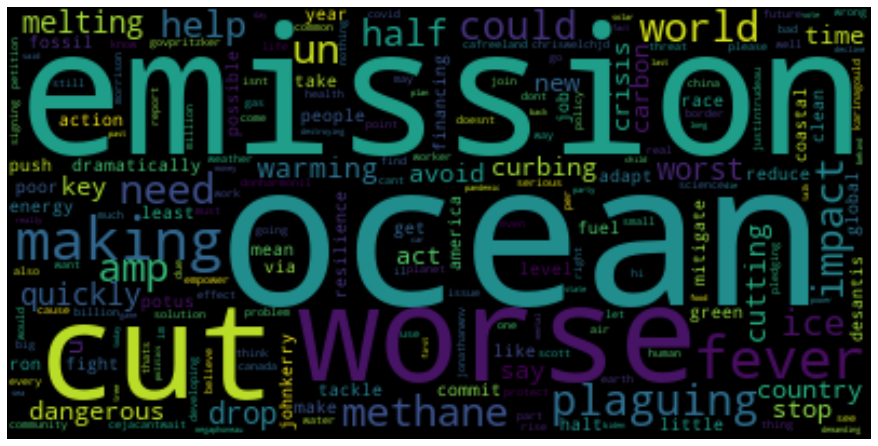

In [12]:
# negative words visualisations
neg_words = df[df['sentiment']=='Negative']
neg_words['tokens'] = neg_words['tweet'].apply(word_tokenize) 
all_words_nsw_nc = list(itertools.chain(*neg_words['tokens']))

# Create counter of words in clean tweets
counts_nsw_nc = collections.Counter(all_words_nsw_nc)
clean_tweets_ncw = pd.DataFrame(counts_nsw_nc.most_common(len(all_words_nsw_nc)),
                             columns=['words', 'count'])

dictionary = dict(zip(clean_tweets_ncw['words'], clean_tweets_ncw['count']))

#Create Word Cloud 
wordcloud = WordCloud.WordCloud(background_color = 'black').generate_from_frequencies(dictionary)

#plot with matplotlib
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)


plt.show()